#### Problem 13

In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

#### Problem 13
#预处理函数
def preprocess(data):
    """
    数据预处理
    """
    #获取维度
    n, d = data.shape
    #分离X
    X = data[:, :-1]
    #添加偏置项1
    X = np.c_[np.ones(n), X]
    #分离y
    y = data[:, -1]
    
    return X, y

#计算w
def w(X, y, Lambda):
    """
    计算岭回归的结果
    """
    d = X.shape[1]
    w = inv(X.T.dot(X) + Lambda * np.eye(d)).dot(X.T).dot(y)
    return w

#计算误差
def E(X, y, w):
    return np.mean(np.sign(X.dot(w)) != y)

#读取数据
train = np.genfromtxt('hw4_train.dat')
test = np.genfromtxt('hw4_test.dat')
X_train, y_train = preprocess(train)
X_test, y_test = preprocess(test)
#计算
w1 = w(X_train, y_train, 11.26)
Ein = E(X_train, y_train, w1)
Eout = E(X_test, y_test, w1)
print("Ein = {}".format(Ein))
print("Eout = {}".format(Eout))

Ein = 0.055
Eout = 0.052


#### Problem 14

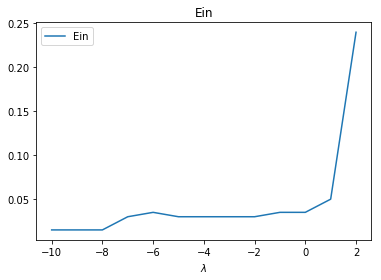

最小Ein对应的Lambda为log10(-8)，对应的Eout为0.02


In [6]:
#### Problem 14
Lambda = range(2, -11, -1)
Ein=[]
Eout=[]
for l in Lambda:
    l1 = 10 ** (l)
    w1 = w(X_train, y_train, l1)
    e_in = E(X_train, y_train, w1)
    e_out = E(X_test, y_test, w1)
    Ein.append(e_in)
    Eout.append(e_out)
    
plt.plot(Lambda, Ein, label='Ein')
plt.xlabel('$\lambda$')
plt.title('Ein')
plt.legend()
plt.show()

Lambda1 = Lambda[np.argmin(Ein)]
Eout1 = Eout[np.argmin(Ein)]
print("最小Ein对应的Lambda为log10({})，对应的Eout为{}".format(Lambda1, Eout1))

#### Problem 15

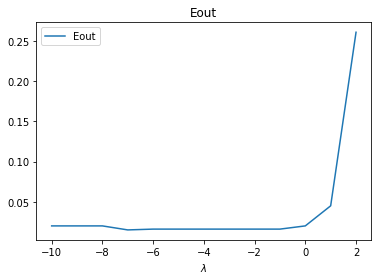

最小Eout对应的Lambda为log10(-7)，对应的Eout为0.015


In [7]:
#### Problem 15
plt.plot(Lambda, Eout, label='Eout')
plt.xlabel('$\lambda$')
plt.title('Eout')
plt.legend()
plt.show()

Lambda2 = Lambda[np.argmin(Eout)]
Eout2 = Eout[np.argmin(Eout)]
print("最小Eout对应的Lambda为log10({})，对应的Eout为{}".format(Lambda2, Eout2))

#### Problem 16

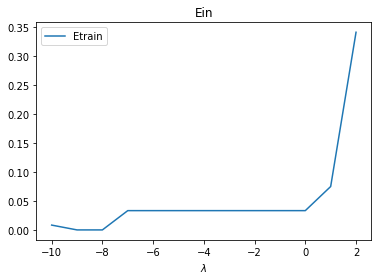

最小Etrain对应的Lambda为log10(-8)，对应的Eout为0.025


In [8]:
####Problem 16
X_train_ = X_train[:120, :]
y_train_ = y_train[:120]
X_val = X_train[120:, :]
y_val = y_train[120:]

Etrain = []
Eout = []
Eval = []
for l in Lambda:
    l1 = 10 ** l
    w1 = w(X_train_, y_train_, l1)
    e_train = E(X_train_, y_train_, w1)
    e_out = E(X_test, y_test, w1)
    e_val = E(X_val, y_val, w1)
    Etrain.append(e_train)
    Eout.append(e_out)
    Eval.append(e_val)
    
plt.plot(Lambda, Etrain, label='Etrain')
plt.xlabel('$\lambda$')
plt.title('Ein')
plt.legend()
plt.show()

Lambda3 = Lambda[np.argmin(Etrain)]
Eout3 = Eout[np.argmin(Etrain)]
print("最小Etrain对应的Lambda为log10({})，对应的Eout为{}".format(Lambda3, Eout3))

#### Problem 17

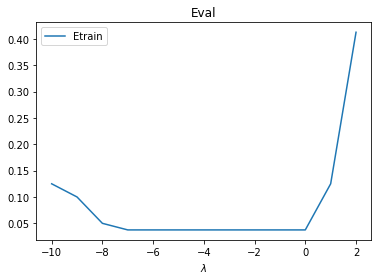

最小Eval对应的Lambda为log10(0)，对应的Eout为0.028


In [9]:
#### Problem 17
plt.plot(Lambda, Eval, label='Etrain')
plt.xlabel('$\lambda$')
plt.title('Eval')
plt.legend()
plt.show()

Lambda4 = Lambda[np.argmin(Eval)]
Eout4 = Eout[np.argmin(Eval)]
print("最小Eval对应的Lambda为log10({})，对应的Eout为{}".format(Lambda4, Eout4))

#### Problem 18

In [10]:
#### Problem 18
l = Lambda[np.argmin(Eval)]
l1 = 10 ** l
w1 = w(X_train, y_train, l1)
Ein = E(X_train, y_train, w1)
Eout = E(X_test, y_test, w1)
print("Ein = {}".format(Ein))
print("Eout = {}".format(Eout))

Ein = 0.035
Eout = 0.02


#### Problem 19

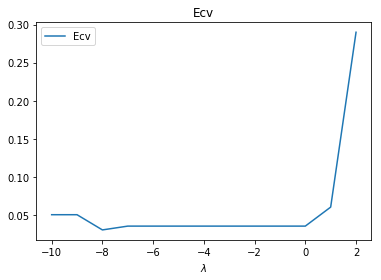

最小Ecv对应的Lambda为log10(-8)


In [12]:
####Problem 19
#准备数据
K = 5
m = X_train.shape[0] // K
data=[]
#将数据拆分成训练集以及验证集
for i in range(K):
    Xtrain = np.r_[X_train[: i*m], X_train[(i+1)*m: ]]
    ytrain = np.r_[y_train[: i*m], y_train[(i+1)*m: ]]
    Xval = X_train[i*m: (i+1)*m]
    yval = y_train[i*m: (i+1)*m]
    data.append([Xtrain, ytrain, Xval, yval])

Ecv = []
for l in Lambda:
    l1 = 10 ** l
    ecv = 0
    for d in data:
        Xtrain, ytrain, Xval, yval = d
        w1 = w(Xtrain, ytrain, l1)
        ecv += E(Xval, yval, w1)
    ecv /= K
    Ecv.append(ecv)
    
plt.plot(Lambda, Ecv, label='Ecv')
plt.xlabel('$\lambda$')
plt.title('Ecv')
plt.legend()
plt.show()

Lambda5 = Lambda[np.argmin(Ecv)]
print("最小Ecv对应的Lambda为log10({})".format(Lambda5))

#### Problem 20

In [13]:
####Problem20
l1 = 10 ** Lambda5
w1 = w(X_train, y_train, l1)
Ein = E(X_train, y_train, w1)
Eout = E(X_test, y_test, w1)
print("Ein = {}".format(Ein))
print("Eout = {}".format(Eout))

Ein = 0.015
Eout = 0.02
